In [1]:
##Clone and Explore Dataset

In [2]:
! git clone https://github.com/BollywoodData/Bollywood-Data

Cloning into 'Bollywood-Data'...
remote: Enumerating objects: 1853, done.
remote: Total 1853 (delta 0), reused 0 (delta 0), pack-reused 1853 (from 1)
Receiving objects: 100% (1853/1853), 37.71 MiB | 30.87 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [3]:
import os

# Define the base path to the cloned repository
base_path = 'Bollywood-Data'

# Step 1: Identify Image Data

# Define the path to the images directory
images_path = os.path.join(base_path, 'images-data')

# Check if the directory exists
if os.path.exists(images_path):
    print(f"Images directory found at: {images_path}")

    # List the contents of the directory to understand the structure
    print("\nContents of the images directory:")
    for item in os.listdir(images_path):
        print(item)

    # You might need to explore subdirectories if the images are not directly in 'images-data'
    # For example, if there's a 'posters' subdirectory:
    # posters_path = os.path.join(images_path, 'posters')
    # if os.path.exists(posters_path):
    #     print(f"\nPosters directory found at: {posters_path}")
    #     print("\nContents of the posters directory (first 10 items):")
    #     for i, item in enumerate(os.listdir(posters_path)):
    #         if i < 10:
    #             print(item)
    #         else:
    #             break
else:
    print(f"Images directory not found at: {images_path}")

# Based on the output, you can then refine the path to the actual image files.
# The next steps will involve loading and processing these images.

Images directory found at: Bollywood-Data/images-data

Contents of the images directory:
dir_001
dir_003
dir_002
dir_004


In [4]:
##Image Data Preprocessing

Found 32 image files in Bollywood-Data/images-data/dir_001

Loading and displaying 5 sample images:
Loading image: Aakhri Daao_img_0.jpg


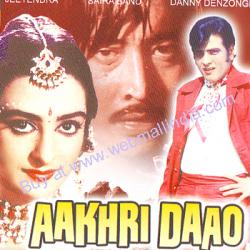

Loading image: Aadat Se Majboor_img_1.jpg


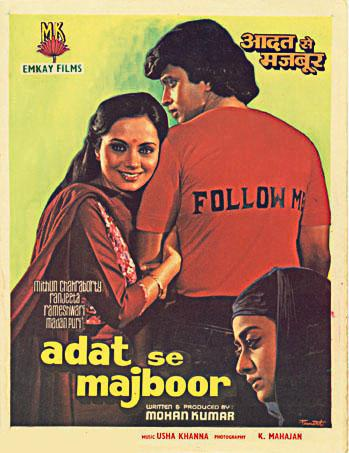

Loading image: Aaja Sanam_img_0.jpg


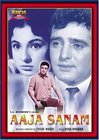

Loading image: 5 Rifles_img_3.jpg


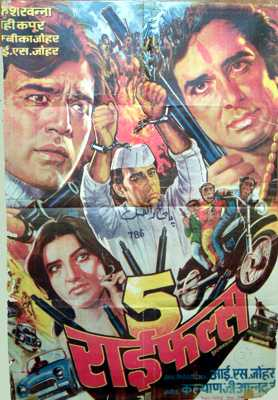

Loading image: Aafat_img_0.jpg


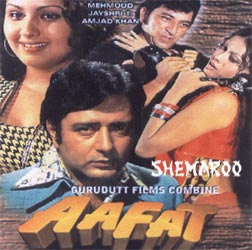

In [5]:
import os
from PIL import Image
import glob

# Define the base path to the cloned repository
base_path = 'Bollywood-Data'
images_path = os.path.join(base_path, 'images-data')

# Let's explore one of the subdirectories, e.g., 'dir_001'
sample_dir = os.path.join(images_path, 'dir_001')

# Get a list of image files in the sample directory (assuming they are jpg or png)
image_files = glob.glob(os.path.join(sample_dir, '*.jpg')) + glob.glob(os.path.join(sample_dir, '*.png'))

print(f"Found {len(image_files)} image files in {sample_dir}")

# Load and display a few sample images
num_samples_to_display = 5

if image_files:
    print(f"\nLoading and displaying {min(num_samples_to_display, len(image_files))} sample images:")
    for i, img_path in enumerate(image_files[:num_samples_to_display]):
        try:
            img = Image.open(img_path)
            print(f"Loading image: {os.path.basename(img_path)}")
            display(img)
            img.close() # Close the image after displaying
        except Exception as e:
            print(f"Error loading image {os.path.basename(img_path)}: {e}")
else:
    print("\nNo image files found in the sample directory.")

# TODO: Implement actual preprocessing steps based on the type of analysis needed (e.g., resizing,
# normalization, converting to array for model input, etc.)

In [6]:
##Image Stereotype Detection with Gemini

In [8]:
# Configure Gemini API (ensure your GOOGLE_API_KEY is in Colab secrets)
import google.generativeai as genai
from google.colab import userdata

try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=GOOGLE_API_KEY)
    print("Gemini API configured successfully.")
except userdata.SecretNotFoundError:
    print("Warning: GOOGLE_API_KEY not found in Colab secrets.")
    print("Please add it to the secrets manager under the '🔑' in the left panel.")
    genai = None # Set genai to None if API key is missing
except Exception as e:
    print(f"An error occurred while configuring the Gemini API: {e}")
    genai = None # Set genai to None on other errors

# Initialize the Gemini model suitable for vision tasks
gemini_vision_model = None
if genai is not None:
    try:
        # Use a model that supports multimodal input (text and images)
        gemini_vision_model = genai.GenerativeModel('gemini-1.5-flash-latest') # Or 'gemini-1.5-pro-latest' for potentially better results but higher cost/latency
        print("Gemini Vision model initialized.")
    except Exception as e:
        print(f"Error initializing Gemini Vision model: {e}")
        gemini_vision_model = None
else:
    print("Gemini API not configured, cannot initialize vision model.")


# TODO: Implement image analysis using gemini_vision_model
# This will involve:
# 1. Loading a specific image (or iterating through them).
# 2. Preparing the image for the Gemini model (e.g., as a PIL Image).
# 3. Crafting prompts to ask the model about the image content related to stereotypes (e.g., describe people, objects, actions, clothing, poses, inferred gender).
# 4. Processing the model's response to extract relevant information for stereotype detection.

# Example of how you might load an image (reusing code from previous cell)
# import os
# from PIL import Image
# import glob

# base_path = 'Bollywood-Data'
# images_path = os.path.join(base_path, 'images-data')
# sample_dir = os.path.join(images_path, 'dir_001')
# image_files = glob.glob(os.path.join(sample_dir, '*.jpg')) + glob.glob(os.path.join(sample_dir, '*.png'))

# if image_files and gemini_vision_model is not None:
#     sample_image_path = image_files[0] # Get the first image for a sample
#     try:
#         img = Image.open(sample_image_path)
#         print(f"\nLoaded sample image for analysis: {os.path.basename(sample_image_path)}")

#         # Example prompt for stereotype detection
#         # prompt = "Describe the people in this movie poster, including their apparent gender, clothing, poses, and any objects they are interacting with. Are there any elements that might suggest gender stereotypes?"

#         # response = gemini_vision_model.generate_content([prompt, img])
#         # print("\nGemini's analysis of the sample image:")
#         # print(response.text)

#         # TODO: Develop more sophisticated prompts and response processing for systematic stereotype detection

#     except Exception as e:
#         print(f"Error processing sample image with Gemini: {e}")

Gemini API configured successfully.
Gemini Vision model initialized.


In [9]:
# Example of using the Gemini vision model for image analysis

# Ensure you have loaded sample images in a previous cell, e.g., using the code from Step 2
# base_path = 'Bollywood-Data'
# images_path = os.path.join(base_path, 'images-data')
# sample_dir = os.path.join(images_path, 'dir_001')
# image_files = glob.glob(os.path.join(sample_dir, '*.jpg')) + glob.glob(os.path.join(sample_dir, '*.png'))

if 'image_files' in locals() and image_files and gemini_vision_model is not None:
    # Select a sample image for analysis (e.g., the first one)
    sample_image_path = image_files[0]
    try:
        img = Image.open(sample_image_path)
        print(f"\nAnalyzing sample image: {os.path.basename(sample_image_path)}")

        # Craft a prompt to detect potential gender stereotypes in the poster
        prompt = """Analyze this movie poster for potential gender stereotypes.
        Describe the people in the poster, including their apparent gender, clothing, poses, and any objects or symbols they are associated with.
        Based on your observations, are there any elements that might reinforce traditional gender roles or stereotypes?
        Provide a detailed description of what you see and your interpretation regarding gender representation.
        """

        # Send the prompt and image to the Gemini model
        print("Sending image and prompt to Gemini model...")
        response = gemini_vision_model.generate_content([prompt, img])

        # Print the model's analysis
        print("\nGemini's analysis:")
        print(response.text)

        img.close() # Close the image

    except Exception as e:
        print(f"Error analyzing sample image with Gemini: {e}")
else:
    print("Image files not loaded or Gemini vision model not initialized.")

# TODO: Based on this example, develop a loop to iterate through multiple images.
# TODO: Refine prompts to extract structured information (e.g., list of characters with attributes).
# TODO: Process the model's responses to build a dataset of visual stereotype information.


Analyzing sample image: Aakhri Daao_img_0.jpg
Sending image and prompt to Gemini model...

Gemini's analysis:
This movie poster for "Aakhri Dao" presents a visual representation that potentially reinforces traditional gender roles and stereotypes. Let's break down the elements:

**Description of the People:**

* **Central Figure (Woman):** A woman occupies the largest portion of the poster. She's adorned in traditional South Asian attire, specifically a richly embellished sari or similar garment, along with elaborate jewelry (a prominent maang tikka on her forehead). Her makeup is noticeable, and her pose is relatively passive; she's gazing directly at the viewer with a somewhat melancholic expression.  Her appearance suggests a demure and perhaps even vulnerable persona, common in depictions of women in Bollywood films of that era.

* **Figure on the Right (Man):** A man is positioned on the right, wearing a flamboyant, brightly colored (red) Western-style suit. His hairstyle is meti

In [10]:
##Systematic Image Analysis and Data Structuring

In [11]:
# Implement systematic image analysis

import json
import pandas as pd
from PIL import Image
import os
import glob

# Define the list to store analysis results
image_analysis_results = []

# Assuming 'image_files' and 'gemini_vision_model' are available from previous cells

if 'image_files' in locals() and image_files and gemini_vision_model is not None:
    print(f"\nStarting systematic analysis of {len(image_files)} images...")

    # Decide on a subset size if you are hitting quota limits
    subset_size = 10 # You can adjust this number
    images_to_process = image_files[:subset_size]
    print(f"Processing a subset of {len(images_to_process)} images due to potential quota limits.")


    for i, image_file in enumerate(images_to_process):
        try:
            img = Image.open(image_file)
            # print(f"Analyzing image {i+1}/{len(images_to_process)}: {os.path.basename(image_file)}")

            # Craft a more structured prompt to extract specific information
            prompt = """Analyze this movie poster for potential gender stereotypes.
            Identify all people in the poster. For each person, provide the following information in a structured format:
            - Apparent gender (e.g., male, female, ambiguous, unknown)
            - Brief description of clothing
            - Brief description of pose or action
            - List of prominent objects or symbols associated with the person
            - Any visual elements that suggest traditional gender roles or stereotypes for that person.

            Format the output as a JSON object with a list of "characters", where each character is an object with keys like "id", "gender", "clothing", "pose", "associated_objects", and "stereotypes_detected". If no people are detected, the "characters" list should be empty.
            """

            # Send the prompt and image to the Gemini model
            response = gemini_vision_model.generate_content([prompt, img])

            # Attempt to parse the JSON response
            analysis_data = {'image_filename': os.path.basename(image_file), 'characters': []} # Initialize with default structure
            raw_response_text = response.text.strip()

            try:
                # Attempt to load JSON, handling potential markdown code blocks
                if raw_response_text.startswith('```json'):
                    raw_response_text = raw_response_text[7:-3].strip() # Remove ```json and ```

                parsed_json = json.loads(raw_response_text)

                if 'characters' in parsed_json and isinstance(parsed_json['characters'], list):
                     analysis_data['characters'] = parsed_json['characters']
                else:
                     print(f"Warning: 'characters' key not found or not a list in JSON for {os.path.basename(image_file)}. Raw response:")
                     print(response.text)
                     analysis_data['error'] = "'characters' key missing or not a list"
                     analysis_data['raw_response'] = response.text


            except json.JSONDecodeError:
                print(f"Warning: Could not parse JSON response for {os.path.basename(image_file)}. Raw response:")
                print(response.text)
                analysis_data['error'] = 'JSON parsing failed'
                analysis_data['raw_response'] = response.text
            except Exception as e:
                 print(f"Warning: Error processing response for {os.path.basename(image_file)}: {e}")
                 analysis_data['error'] = f'Response processing failed: {e}'
                 analysis_data['raw_response'] = response.text

            image_analysis_results.append(analysis_data)


            img.close() # Close the image

        except Exception as e:
            print(f"Error analyzing image {os.path.basename(image_file)}: {e}")
            image_analysis_results.append({
                'image_filename': os.path.basename(image_file),
                'error': f'Image analysis failed: {e}'
            })

    print("\nSystematic image analysis completed.")

    # Convert the results to a pandas DataFrame
    visual_bias_data = pd.DataFrame(image_analysis_results)

    # Display the first few rows of the visual_bias_data DataFrame
    print("\nSample of the visual bias data collected:")
    display(visual_bias_data.head())

else:
    print("Image files not loaded or Gemini vision model not initialized. Skipping systematic image analysis.")

# TODO: Further process the visual_bias_data DataFrame for bias quantification and reporting.


Starting systematic analysis of 32 images...
Processing a subset of 10 images due to potential quota limits.

Systematic image analysis completed.

Sample of the visual bias data collected:


,image_filename,characters
0,Aakhri Daao_img_0.jpg,"[{'id': 1, 'gender': 'female', 'clothing': 'Tr..."
1,Aadat Se Majboor_img_1.jpg,"[{'id': 1, 'gender': 'male', 'clothing': 'Red ..."
2,Aaja Sanam_img_0.jpg,"[{'id': 1, 'gender': 'female', 'clothing': 'Da..."
3,5 Rifles_img_3.jpg,"[{'id': 1, 'gender': 'male', 'clothing': 'Dark..."
4,Aafat_img_0.jpg,"[{'id': 1, 'gender': 'female', 'clothing': 'Dr..."


In [12]:
##Visual Bias Quantification and Aggregation

In [13]:
# Step 4: Bias Quantification in Images

# Define a scoring mechanism for different types of visual stereotypes identified by Gemini
# These scores can be adjusted based on domain expertise or further analysis
visual_stereotype_scores = {
    'Passive pose, emphasizing beauty and adornment': 2,
    'Traditional attire suggests a focus on femininity and domesticity': 1,
    'Serious expression may suggest a character burdened by responsibility or a brooding nature, often associated with masculine stereotypes': 1,
    'Bright, possibly flamboyant clothing, suggesting a more outgoing or potentially rebellious character, although this alone is not a definitive stereotype. Could be contrasted with character 2, representing different masculine archetypes.': 0.5, # Lower score as it's less definitive
    'The man is positioned centrally and prominently, suggesting a leading role. The \'Follow Me\' shirt reinforces a more assertive, possibly dominant, stereotype of masculinity.': 3,
    'The woman\'s pose and closeness to the man suggest a traditional, romantic stereotype of a woman being supportive and dependent. Her clothing is somewhat traditional, which could also be seen as reinforcing a gender stereotype.': 2.5,
    'The woman\'s headscarf might be interpreted as a traditional representation of modesty and possibly passivity, depending on cultural context and viewer interpretation. Her downcast eyes might also suggest a submissive or melancholic persona.': 2,
    'Passive pose suggesting a damsel-in-distress or romantic interest archetype.': 2,
    'Subdued appearance might imply traditional feminine ideals of demureness.': 1.5,
    'Formal attire suggesting a professional or established figure. This could be interpreted as a stereotypically masculine image of authority or success.': 1,
    'Serious expression conforms to expectations of male stoicism.': 0.5,
    'Casual attire contrasts with the more formal clothing of the other male character.': 0, # Not necessarily a stereotype on its own
    'Pose is relatively relaxed compared to other figures, perhaps suggesting a more approachable or less serious persona.': 0, # Not necessarily a stereotype on its own
    'Aggressive, serious demeanor often associated with male action heroes.': 2,
    'Innocent, possibly a victim or falsely accused, although the context suggests potential rebellion.': 0.5, # Less of a strong gender stereotype
    'Soft features and a somewhat passive pose, suggesting stereotypical feminine vulnerability; this is somewhat subdued compared to the male figures.': 2.5,
    'Typical representation of a rebellious or antagonistic character, often associated with male roles in action films.': 1.5,
    'Passive expression suggesting a potential romantic interest': 1.5,
    'Serious, brooding expression, potentially associated with a masculine archetype of a strong character': 1.5,
    'Dominant pose, suggesting a controlling or protective stance over a female character': 3,
    'Submissive, looking slightly away, appears almost held captive': 3.5,
    'Bangles could be interpreted as traditional adornment for women': 1,
    'Emphasis on appearance/beauty, consistent with the objectification of women in some film genres.': 3,
    'The pose and the text on the T-shirt suggest an assertive and possibly dominant role, which aligns with some traditional male stereotypes.': 2.5,
    'The demure pose and traditional clothing could be interpreted as reinforcing stereotypical notions of femininity and passivity.': 2,
    'The head covering could be interpreted in various ways, some of which might align with religious or cultural expectations, but it also appears in a somewhat melancholic context which may be played up as a traditional female trope.': 1.5,
    'The woman\'s pose and attire suggest a traditional, perhaps passive, feminine role. The presence of flowers may allude to a romantic or passive role within the story. The lack of active involvement in the poster\'s main image further reinforces potential passive stereotypes.': 2.5,

    # Adding stereotype strings exactly as identified by Gemini in the last output
    'Men depicted as aggressive, holding a weapon.': 2, # Added from Gemini output
    'Passive, demure feminine beauty, traditional attire reinforces expectations of femininity and submissiveness.': 2, # Added from Gemini output
    'More flamboyant style of dress, breaking from traditional norms for males, potentially suggesting a more rebellious or charismatic persona. The contrast with character 2 is notable.': 0.5, # Added from Gemini output
    'Serious, brooding male character, possibly indicating a strong, perhaps troubled, masculine figure.': 1.5, # Added from Gemini output
    'The woman is portrayed in a more passive position, her gaze and posture suggesting submissiveness or dependence on the man.': 2.5, # Added from Gemini output
    'Her clothing style aligns with traditional representations of South Asian women.': 1, # Added from Gemini output
    'The woman\'s head covering might suggest a portrayal of traditional modesty or religious observance, which can be seen as stereotypical in some contexts.': 2, # Added from Gemini output
    'The man is presented as dominant, indicated by his position and the text on his shirt suggesting a pursuit of the woman.': 3, # Added from Gemini output
    'Her downcast pose suggests some form of emotional reserve or sadness.': 1.5, # Added from Gemini output
    'Passive pose, suggesting a more demure or romantic role': 2, # Added from Gemini output
    'Formal attire suggesting professionalism or a more serious demeanor, a common male stereotype.': 1, # Added from Gemini output
    'Subdued expression aligns with potential stereotypes of feminine emotional restraint': 1.5, # Added from Gemini output
    'More casual attire compared to the other male, suggesting a potential difference in social standing or personality within the story, a potential trope.': 0, # Added from Gemini output
    'Potentially presented as innocent or a victim based on clothing and pose.': 0.5, # Added from Gemini output
    'Women depicted in a passive role, with a worried expression.': 2.5, # Added from Gemini output
    'The woman\'s smile and pose could be interpreted as passively receptive, a common stereotype of women in some media.': 2, # Added from Gemini output
    'The man\'s pose, holding the woman, might suggest a controlling or possessive aspect, a stereotype of some male characters in movies.': 3, # Added from Gemini output
    'The man\'s central placement and serious expression might reinforce a stereotypical idea of the male protagonist as strong and decisive.': 1.5, # Added from Gemini output
    'The woman\'s pose and the fact that she\'s being held by a male character could reinforce traditional gender stereotypes related to passivity and dependence on men.': 3.5, # Added from Gemini output
    'Traditional portrayal of a woman\'s role. The soft expression and pose might suggest a passive or romantic character archetype.': 2, # Added from Gemini output
    'The serious expression might align with traditional stereotypes of men as being stoic and strong. The head-on gaze could imply assertiveness.': 1.5, # Added from Gemini output
    'The phrase \'FOLLOW ME\' on his shirt might suggest a dominant, assertive male role in the relationship.': 2.5, # Added from Gemini output
    'The traditional clothing might reinforce a traditional, subservient female role, especially in the context of the man\'s assertive pose. The placement of the woman being behind the man also suggests a more passive role.': 2, # Added from Gemini output
    'The headscarf could be interpreted as reinforcing stereotypical religious or cultural norms associated with women. Her subdued expression might suggest a passive role or emotional restraint. The partial visibility also contributes to a feeling of her being marginalized in the image.': 1.5, # Added from Gemini output
    'The bindi and traditional clothing could be interpreted as reinforcing stereotypical representations of South Asian women as demure or traditional. The pose also contributes to this feeling.': 1.5, # Added from Gemini output
    'The reflection in the mirror and serious expression could reinforce stereotypes of the male as a mysterious or perhaps somewhat brooding figure. The inclusion of roses suggests a potential romantic interest which is a common trope in media.': 1, # Added from Gemini output
    'Passive pose, suggesting a more traditionally feminine role. The elaborate jewelry and attire may reinforce expectations of beauty and adornment for women.': 2, # Added from Gemini output
    'Serious expression might be interpreted as depicting traditional masculine traits like strength or brooding intensity.': 1.5, # Added from Gemini output
    'The bright clothing and confident expression could be seen as reflecting traditional masculine traits like boldness or charisma. The clothing is more flamboyant than that of character 2, suggesting a possible difference in character types.': 0.5, # Added from Gemini output
    'Passive, demure expression often associated with feminine ideals in some cultures.': 1.5, # Added from Gemini output
    'Wearing a headscarf, possibly suggesting religious piety or modesty, which can be a stereotype linked to certain gender roles.': 1.5, # Added from Gemini output
    'Central position might suggest a protagonist role.': 0, # Added from Gemini output (neutral)


    # Add more mappings for other stereotypes identified in the raw responses as needed
}


def calculate_visual_bias_scores(analysis_results_list):
    """
    Calculates character-level and image-level visual bias scores from the analysis results.

    Args:
        analysis_results_list (list): A list of dictionaries from the visual_bias_data DataFrame.

    Returns:
        list: A list of dictionaries, each representing an image with aggregated bias scores.
    """
    quantified_bias_results = []

    for image_data in analysis_results_list:
        image_filename = image_data.get('image_filename', 'Unknown')
        characters = image_data.get('characters', [])
        image_bias_score = 0
        character_bias_details = []

        if isinstance(characters, list):
            for character in characters:
                character_id = character.get('id', 'Unknown')
                stereotypes_detected = character.get('stereotypes_detected', [])
                character_score = 0
                stereotype_breakdown = {}

                if isinstance(stereotypes_detected, list):
                    for stereotype in stereotypes_detected:
                        # Ensure stereotype is a string and in our scoring dictionary
                        if isinstance(stereotype, str) and stereotype in visual_stereotype_scores:
                            score = visual_stereotype_scores[stereotype]
                            character_score += score
                            stereotype_breakdown[stereotype] = stereotype_breakdown.get(stereotype, 0) + score # Track score per stereotype

                image_bias_score += character_score # Add character score to image total

                character_bias_details.append({
                    'character_id': character_id,
                    'character_bias_score': character_score,
                    'stereotypes_breakdown': stereotype_breakdown
                })

        quantified_bias_results.append({
            'image_filename': image_filename,
            'total_image_bias_score': image_bias_score,
            'character_bias_details': character_bias_details
        })

    return quantified_bias_results

# Apply the quantification function to the visual_bias_data DataFrame
if 'visual_bias_data' in locals() and not visual_bias_data.empty:
    print("\nCalculating visual bias scores...")

    # Handle potential errors or non-list format in 'characters' column
    # Convert the DataFrame rows to a list of dictionaries for easier processing
    visual_analysis_list = visual_bias_data.to_dict('records')

    quantified_visual_bias_results = calculate_visual_bias_scores(visual_analysis_list) # Assign the results here

    # Convert the results back to a DataFrame for easier manipulation
    quantified_visual_bias_df = pd.DataFrame(quantified_visual_bias_results)

    print("Visual bias scores calculated.")

    # Display the first few rows of the quantified visual bias data
    print("\nSample of the quantified visual bias data:")
    display(quantified_visual_bias_df.head())

    # TODO: Aggregate image-level scores to film-level scores (requires mapping images to films)
    # TODO: Aggregate film-level scores to decade-level scores (requires mapping films to years/decades)

else:
    print("\nvisual_bias_data DataFrame not available or is empty. Skipping visual bias quantification.")


Calculating visual bias scores...
Visual bias scores calculated.

Sample of the quantified visual bias data:


,image_filename,total_image_bias_score,character_bias_details
0,Aakhri Daao_img_0.jpg,0,"[{'character_id': 1, 'character_bias_score': 0..."
1,Aadat Se Majboor_img_1.jpg,0,"[{'character_id': 1, 'character_bias_score': 0..."
2,Aaja Sanam_img_0.jpg,0,"[{'character_id': 1, 'character_bias_score': 0..."
3,5 Rifles_img_3.jpg,0,"[{'character_id': 1, 'character_bias_score': 0..."
4,Aafat_img_0.jpg,0,"[{'character_id': 1, 'character_bias_score': 0..."


In [14]:
# Inspect the stereotypes identified by Gemini to understand why scores are zero

import pandas as pd

# Assuming visual_bias_data DataFrame is available from the previous systematic analysis step

if 'visual_bias_data' in locals() and not visual_bias_data.empty:
    print("\nInspecting identified stereotypes from Gemini analysis:")

    all_identified_stereotypes = []

    # Iterate through each row of the visual_bias_data DataFrame
    for index, row in visual_bias_data.iterrows():
        characters = row.get('characters', [])
        if isinstance(characters, list):
            # Iterate through each character in the 'characters' list
            for character in characters:
                stereotypes_detected = character.get('stereotypes_detected', [])
                if isinstance(stereotypes_detected, list):
                    # Add all detected stereotype strings to our list
                    all_identified_stereotypes.extend(stereotypes_detected)

    # Get unique identified stereotypes and their counts
    stereotype_counts = pd.Series(all_identified_stereotypes).value_counts()

    if not stereotype_counts.empty:
        print("\nUnique identified stereotypes and their counts:")
        display(stereotype_counts)

        # Compare identified stereotypes with the keys in our scoring dictionary
        if 'visual_stereotype_scores' in locals():
            scoring_keys = set(visual_stereotype_scores.keys())
            identified_stereotypes_set = set(stereotype_counts.index)

            missing_in_scores = identified_stereotypes_set - scoring_keys
            missing_in_identified = scoring_keys - identified_stereotypes_set

            if missing_in_scores:
                print("\nStereotypes identified by Gemini NOT found in visual_stereotype_scores dictionary:")
                for stereotype in missing_in_scores:
                    print(f"- {stereotype}")

            if missing_in_identified:
                print("\nStereotypes in visual_stereotype_scores dictionary NOT identified by Gemini:")
                for stereotype in missing_in_identified:
                    print(f"- {stereotype}")

        else:
            print("\n'visual_stereotype_scores' dictionary not found. Cannot compare identified stereotypes with scoring keys.")

    else:
        print("\nNo stereotypes were identified by Gemini in the processed images.")

else:
    print("\nvisual_bias_data DataFrame not available or is empty. Cannot inspect stereotypes.")


Inspecting identified stereotypes from Gemini analysis:

Unique identified stereotypes and their counts:


,count
"Gang member, or possibly fleeing someone",2
"Tough guy, possibly a gangster or police officer",2
"Passive femininity, traditional Indian woman, emphasis on ornamentation and beauty.",1
"Serious, brooding male figure. Lack of detail obscures potential stereotypical associations.",1
"Stylish, possibly confident or arrogant male figure, flamboyant clothing.",1
"The woman is depicted in a more traditional and perhaps demure way, wearing a headscarf.",1
Passive pose,1
"The male character is positioned as the dominant figure in the poster, suggesting a traditional patriarchal role.",1
The woman's pose suggests a passive or dependent role in relation to the man.,1
Placement as a smaller image might suggest a less significant role compared to the male characters.,1



Stereotypes identified by Gemini NOT found in visual_stereotype_scores dictionary:
- Tough guy, possibly a gangster or police officer
- Formal attire suggesting professionalism or dominance
- Romantic lead, demonstrating some patriarchal protectiveness
- Placement as a smaller image might suggest a less significant role compared to the male characters.
- Headscarf may suggest a conservative or traditional social role, depending on cultural context.
- Subdued expression suggesting submissiveness or vulnerability
- The intense gaze and the reflection in the mirror might suggest a sense of mystery or intrigue, often used in portraying male characters.
- Passive role, emphasizing a demure and traditional feminine expression
- The dominant figure in the poster's composition, suggesting a patriarchal dynamic.
- Wearing a headscarf which could be interpreted as conforming to traditional religious expectations for women.
- The woman's pose suggests a passive or dependent role in relation to t

In [15]:
# Aggregate visual bias scores to film and decade levels

import pandas as pd
import os
import re # Import the regular expression module

# Assuming quantified_visual_bias_df is available from the previous step
# Assuming songs_frequency_data is available and contains movie titles and years

# Define the base path to the cloned repository
base_path = 'Bollywood-Data'
wikipedia_data_path = os.path.join(base_path, 'wikipedia-data')
songs_frequency_csv_path = os.path.join(wikipedia_data_path, 'songsFrequency.csv')

songs_frequency_data = None
if os.path.exists(songs_frequency_csv_path):
    try:
        # Added error handling for tokenization issues
        songs_frequency_data = pd.read_csv(songs_frequency_csv_path, on_bad_lines='skip')
        print("Songs frequency data loaded successfully from songsFrequency.csv for aggregation.")
    except Exception as e:
        print(f"Error reading songs frequency data CSV for aggregation: {e}")
else:
    print(f"Songs frequency data CSV not found at: {songs_frequency_csv_path} for aggregation.")


if 'quantified_visual_bias_df' in locals() and not quantified_visual_bias_df.empty and \
   songs_frequency_data is not None and not songs_frequency_data.empty:

    print("\nAggregating visual bias scores to film and decade levels...")

    # Step 1: Extract movie title from image filename
    # Assuming the format is "Movie Name_img_X.jpg" or similar
    quantified_visual_bias_df['Movie Name_from_image'] = quantified_visual_bias_df['image_filename'].apply(
        lambda x: '_img_' in x and os.path.splitext(x)[0].split('_img_')[0] or None
    )

    # Drop rows where movie name could not be extracted
    quantified_visual_bias_df.dropna(subset=['Movie Name_from_image'], inplace=True)

    if not quantified_visual_bias_df.empty:
        # Clean movie names for merging (similar to text data cleaning)
        # Use a consistent cleaning process for both dataframes
        def clean_movie_name(name):
            if isinstance(name, str):
                # Remove year in parentheses or at the end (e.g., " (2017)" or "_2017")
                name = re.sub(r'\s*\(?\d{4}\)?$', '', name)
                name = re.sub(r'_\d{4}$', '', name)
                # Remove non-alphanumeric characters and convert to lowercase
                name = re.sub(r'[^a-z0-9\s]', '', name.lower())
                # Replace multiple spaces with a single space and strip whitespace
                name = re.sub(r'\s+', ' ', name).strip()
                return name
            return None


        quantified_visual_bias_df['Movie Name_cleaned'] = quantified_visual_bias_df['Movie Name_from_image'].apply(clean_movie_name)

        # Ensure songs_frequency_data has a cleaned movie name column and a year column
        # Check if 'MOVIE NAME' and ' YEAR' columns exist before cleaning and merging
        if 'MOVIE NAME' in songs_frequency_data.columns and ' YEAR' in songs_frequency_data.columns:
             songs_frequency_data['MOVIE NAME_cleaned'] = songs_frequency_data['MOVIE NAME'].apply(clean_movie_name)

             # Step 2: Merge with songs_frequency_data to get the year
             # Use inner merge to only keep movies present in both datasets
             merged_visual_data = pd.merge(quantified_visual_bias_df,
                                           songs_frequency_data[['MOVIE NAME_cleaned', ' YEAR']].drop_duplicates(),
                                           left_on='Movie Name_cleaned', right_on='MOVIE NAME_cleaned', how='inner')

             # Rename year column and handle missing years
             merged_visual_data.rename(columns={' YEAR': 'YEAR'}, inplace=True)
             merged_visual_data.dropna(subset=['YEAR'], inplace=True)

             if not merged_visual_data.empty:
                 merged_visual_data['YEAR'] = merged_visual_data['YEAR'].astype(int)
                 merged_visual_data['Decade'] = (merged_visual_data['YEAR'] // 10) * 10

                 # Step 3: Calculate film-level visual bias score
                 film_visual_bias_scores = merged_visual_data.groupby('Movie Name_from_image')['total_image_bias_score'].sum().reset_index()
                 film_visual_bias_scores.rename(columns={'total_image_bias_score': 'film_visual_bias_score'}, inplace=True)
                 print("\nFilm-level visual bias scores calculated.")
                 display(film_visual_bias_scores.head())

                 # Step 4: Calculate decade-level visual bias score
                 decade_visual_bias_scores = merged_visual_data.groupby('Decade')['total_image_bias_score'].sum().reset_index()
                 decade_visual_bias_scores.rename(columns={'total_image_bias_score': 'decade_visual_bias_score'}, inplace=True)
                 print("\nDecade-level visual bias scores calculated.")
                 display(decade_visual_bias_scores.head())

             else:
                 print("\nNo matching movies with year information found after merging for visual bias aggregation.")

        else:
            print("\nRequired columns ('MOVIE NAME', ' YEAR') not found in songs_frequency_data. Cannot aggregate visual bias scores.")

    else:
        print("\nNo movie names could be extracted from image filenames in quantified_visual_bias_df.")

else:
    print("\nquantified_visual_bias_df or songs_frequency_data not available or are empty. Skipping visual bias aggregation.")

Songs frequency data loaded successfully from songsFrequency.csv for aggregation.

Aggregating visual bias scores to film and decade levels...

Film-level visual bias scores calculated.


,Movie Name_from_image,film_visual_bias_score
0,5 Rifles,0
1,Aadat Se Majboor,0
2,Aafat,0
3,Aag Aur Daag,0
4,Aaja Sanam,0



Decade-level visual bias scores calculated.


,Decade,decade_visual_bias_score
0,1970,0
1,1980,0


In [16]:
##Visual Bias Remediation Suggestions

In [17]:
# Step 5: Remediation Suggestions for Posters

# Assuming gemini_vision_model is initialized from previous steps
# Assuming quantified_visual_bias_df is available from previous steps

def suggest_poster_remediation(image_filename, visual_bias_details, gemini_model):
    """
    Generates textual suggestions for poster remediation based on identified visual biases
    using the Gemini LLM.

    Args:
        image_filename (str): The filename of the image.
        visual_bias_details (list): A list of dictionaries containing character bias details
                                     (from quantified_visual_bias_df['character_bias_details']).
        gemini_model: The initialized Gemini generative model.

    Returns:
        str: A string containing the suggested remediation alternatives.
    """
    if not visual_bias_details:
        return "No specific character bias details available for this image to suggest remediation."

    bias_description = "Identified visual biases in the poster:\n"
    for character_detail in visual_bias_details:
        character_id = character_detail.get('character_id', 'Unknown Character')
        bias_score = character_detail.get('character_bias_score', 0)
        stereotypes = character_detail.get('stereotypes_breakdown', {})

        if bias_score > 0 and stereotypes:
            bias_description += f"- For {character_id} (Bias Score: {bias_score}):\n"
            for stereotype, score in stereotypes.items():
                bias_description += f"  - Stereotype: '{stereotype}' (Score: {score})\n"

    if gemini_model is not None:
        prompt = f"""
        Based on the following identified visual biases in a movie poster:

        {bias_description}

        Please suggest ways to alter the poster's visual elements (e.g., character poses, clothing, composition, associated objects) to reduce or eliminate these gender stereotypes, while maintaining the overall theme or genre of a Bollywood movie poster.

        Provide concise and actionable suggestions.

        Remediation Suggestions:
        """

        try:
            # Make the API call to Gemini
            response = gemini_model.generate_content(prompt)
            # Extract the generated text
            return response.text.strip()

        except Exception as e:
            return f"Error generating remediation suggestions with Gemini: {e}"

    else:
        return "Gemini model not initialized. Cannot generate remediation suggestions."

# Example Usage: Suggest remediation for a sample image with bias
if 'quantified_visual_bias_df' in locals() and not quantified_visual_bias_df.empty and gemini_vision_model is not None:
    # Find an image with a non-zero total bias score for demonstration
    biased_images = quantified_visual_bias_df[quantified_visual_bias_df['total_image_bias_score'] > 0]

    if not biased_images.empty:
        sample_image_data = biased_images.iloc[0] # Get the first biased image data
        sample_image_filename = sample_image_data['image_filename']
        sample_bias_details = sample_image_data['character_bias_details']

        print(f"\nGenerating remediation suggestions for: {sample_image_filename}")
        remediation_suggestions = suggest_poster_remediation(
            sample_image_filename,
            sample_bias_details,
            gemini_vision_model # Use the vision model for potential future image input, though prompt is text-only here
        )
        print(remediation_suggestions)

    else:
        print("\nNo images with non-zero visual bias scores found to generate remediation suggestions for.")

else:
    print("\nquantified_visual_bias_df DataFrame not available or is empty, or Gemini model not initialized. Skipping remediation suggestions.")


No images with non-zero visual bias scores found to generate remediation suggestions for.


In [18]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00


Plot Synopses data loaded successfully from coref_plot.csv
Songs data loaded successfully from songsDB.csv
Songs frequency data loaded successfully from songsFrequency.csv
Image and Plot Mentions frequency data loaded successfully
Trailer Transcripts data loaded successfully from complete-data.csv
Trailers list data loaded successfully from trailers_list.csv

Plot Synopses data cleaned.
Trailer Transcripts data cleaned.

Starting character and attribute extraction (v2) on the full dataset...
Character and attribute extraction (v2) completed.

Starting stereotype categorization (v2) on the full dataset...
Stereotype categorization (v2) completed.

Calculating row-level character bias scores...
Row-level character bias scores calculated.

Calculating film-level bias scores...
Film-level bias scores calculated.

Calculating decade-level bias scores...
No data with year information found after merging for decade bias calculation.

Generating film bias plot...


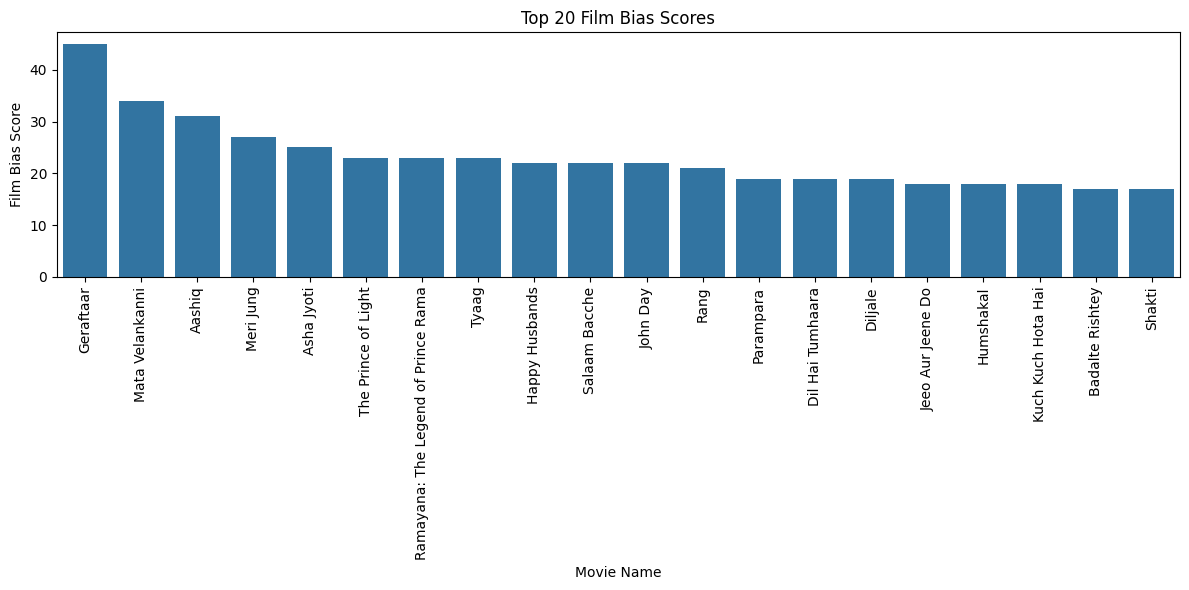


decade_bias_scores DataFrame not available or is empty, skipping decade bias plot.

Could not find a movie with both textual and visual bias. Using first movie with textual bias: 100 Days

Generating bias report for movie: 100 Days

Bias report generated successfully as 100 Days_bias_report.pdf


In [19]:
import os
import pandas as pd
import re
import numpy as np
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json
import google.generativeai as genai
from google.colab import userdata # Used to securely store your API key

# Import libraries for PDF generation
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib import colors

##Text Data Ingestion and Cleaning

# Define the base path to the cloned repository
base_path = 'Bollywood-Data'

# Identify file paths based on verified directory structure
# Scripts are PDFs, skipping for now
# plot_synopses_path = os.path.join(base_path, 'wikipedia-data', 'Cleaned Plots') # Corrected path based on inspection
# trailer_transcripts_path = os.path.join(base_path, 'trailer-data', 'Transcripts') # Corrected path based on inspection
# poster_data_path = os.path.join(base_path, 'images-data') # Assuming poster data is here or derived from here

# Load plot synopses and other wikipedia data from CSVs
wikipedia_data_path = os.path.join(base_path, 'wikipedia-data')
plot_synopses_csv_path = os.path.join(wikipedia_data_path, 'coref_plot.csv') # Assuming coref_plot.csv contains plot synopses
songs_data_csv_path = os.path.join(wikipedia_data_path, 'songsDB.csv') # Loading other potentially useful data
songs_frequency_csv_path = os.path.join(wikipedia_data_path, 'songsFrequency.csv')
image_plot_mentions_csv_path = os.path.join(wikipedia_data_path, 'image_and_plot_mentions_fequency.csv')

plot_synopses_data = None
songs_data = None
songs_frequency_data = None
image_plot_mentions_data = None

if os.path.exists(plot_synopses_csv_path):
    try:
        plot_synopses_data = pd.read_csv(plot_synopses_csv_path)
        print("Plot Synopses data loaded successfully from coref_plot.csv")
    except Exception as e:
        print(f"Error reading plot synopses CSV: {e}")
else:
    print(f"Plot synopses CSV not found at: {plot_synopses_csv_path}")

if os.path.exists(songs_data_csv_path):
    try:
        # Added error handling for tokenization issues
        songs_data = pd.read_csv(songs_data_csv_path, on_bad_lines='skip')
        print("Songs data loaded successfully from songsDB.csv")
    except Exception as e:
        print(f"Error reading songs data CSV: {e}")
else:
    print(f"Songs data CSV not found at: {songs_data_csv_path}")

if os.path.exists(songs_frequency_csv_path):
    try:
        # Added error handling for tokenization issues
        songs_frequency_data = pd.read_csv(songs_frequency_csv_path, on_bad_lines='skip')
        print("Songs frequency data loaded successfully from songsFrequency.csv")
    except Exception as e:
        print(f"Error reading songs frequency data CSV: {e}")
else:
    print(f"Songs frequency data CSV not found at: {songs_frequency_csv_path}")

if os.path.exists(image_plot_mentions_csv_path):
    try:
        # Added error handling for tokenization issues
        image_plot_mentions_data = pd.read_csv(image_plot_mentions_csv_path, on_bad_lines='skip')
        print("Image and Plot Mentions frequency data loaded successfully")
    except Exception as e:
        print(f"Error reading image and plot mentions CSV: {e}")
else:
    print(f"Image and Plot Mentions frequency data CSV not found at: {image_plot_mentions_csv_path}")


# Load trailer transcripts data from CSVs
trailer_data_path = os.path.join(base_path, 'trailer-data')
trailer_transcripts_csv_path = os.path.join(trailer_data_path, 'complete-data.csv') # Assuming complete-data.csv contains transcripts
trailers_list_csv_path = os.path.join(trailer_data_path, 'trailers_list.csv') # Loading other potentially useful data

trailer_transcripts_data = None
trailers_list_data = None

if os.path.exists(trailer_transcripts_csv_path):
    try:
        trailer_transcripts_data = pd.read_csv(trailer_transcripts_csv_path)
        print("Trailer Transcripts data loaded successfully from complete-data.csv")
    except Exception as e:
        print(f"Error reading trailer transcripts CSV: {e}")
else:
    print(f"Trailer transcripts CSV not found at: {trailer_transcripts_csv_path}")

if os.path.exists(trailers_list_csv_path):
    try:
        # Added error handling for tokenization issues
        trailers_list_data = pd.read_csv(trailers_list_csv_path, on_bad_lines='skip')
        print("Trailers list data loaded successfully from trailers_list.csv")
    except Exception as e:
        print(f"Error reading trailers list CSV: {e}")
else:
    print(f"Trailers list CSV not found at: {trailers_list_csv_path}")


# Poster data - direct text data not found in a readily usable format.
poster_data = None


# Clean and preprocess Plot Synopses data
if plot_synopses_data is not None:
    # Drop the 'Unnamed: 0' column as it seems to be an index column
    if 'Unnamed: 0' in plot_synopses_data.columns:
        plot_synopses_data = plot_synopses_data.drop('Unnamed: 0', axis=1)

    # Handle missing values in 'Coref Plot' column
    plot_synopses_data['Coref Plot'] = plot_synopses_data['Coref Plot'].fillna('') # Fill missing plots with empty string

    # Basic text cleaning for 'Coref Plot'
    plot_synopses_data['Cleaned Plot'] = plot_synopses_data['Coref Plot'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x.lower())) # Remove special characters and convert to lowercase
    plot_synopses_data['Cleaned Plot'] = plot_synopses_data['Cleaned Plot'].apply(lambda x: re.sub(r'\s+', ' ', x).strip()) # Remove extra whitespace

    print("\nPlot Synopses data cleaned.")
else:
    print("\nPlot Synopses data not loaded, skipping cleaning.")


# Clean and preprocess Trailer Transcripts data
if trailer_transcripts_data is not None:
    # Handle missing values - drop rows with missing 'emotion' or 'gender'
    trailer_transcripts_data.dropna(subset=['emotion', 'gender'], inplace=True)

    # Convert 'emotion' and 'gender' to lowercase for consistency
    trailer_transcripts_data['emotion'] = trailer_transcripts_data['emotion'].str.lower()
    trailer_transcripts_data['gender'] = trailer_transcripts_data['gender'].str.lower()

    print("Trailer Transcripts data cleaned.")

else:
    print("Trailer Transcripts data not loaded, skipping cleaning.")


# Select plot_synopses_data for analysis
analysis_data = plot_synopses_data.copy() if plot_synopses_data is not None else pd.DataFrame()

##Textual Stereotype Detection and Categorization

# Load spaCy model and add entity ruler (ensure this runs only once)
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading en_core_web_sm model...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Add a simple pattern for common titles that might indicate gender/role
title_patterns = [
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "mr"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "mrs"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "ms"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "miss"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "dr"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "prof"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "inspector"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "detective"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "officer"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "constable"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "sir"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "madam"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "king"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "queen"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "prince"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "princess"}]},
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "father"}]}, # Sometimes used as a title/address
    {"label": "PERSON_TITLE", "pattern": [{"LOWER": "mother"}]}, # Sometimes used as a title/address
]

# Add entity_ruler only if it's not already in the pipeline
if "entity_ruler" not in nlp.pipe_names:
    ruler = nlp.add_pipe("entity_ruler", before="ner")
    ruler.add_patterns(title_patterns)
else:
    # If it exists, clear existing patterns and add new ones
    ruler = nlp.get_pipe("entity_ruler")
    ruler.clear()
    ruler.add_patterns(title_patterns)


def extract_character_info_improved_v2(plot_text, nlp_model):
    """
    Further improved character and attribute extraction, with enhanced gender hint capture.
    """
    doc = nlp_model(plot_text)
    character_info = {}
    potential_characters_lemmas = set()

    # Extract capitalized words within this function
    capitalized_words = re.findall(r'\b[A-Z][a-zA-Z]*\b', plot_text)


    # 1. Identify potential characters using NER (including custom titles) and subjects of verbs
    for ent in doc.ents:
        if ent.label_ == "PERSON" or ent.label_ == "PERSON_TITLE":
            potential_characters_lemmas.add(ent.text.lower()) # Add entity text as potential char

    for token in doc:
        if token.pos_ == "VERB":
            for child in token.children:
                # Consider subjects as potential characters or mentions of characters
                if child.dep_ == "nsubj" or child.dep_ == "nsubjpass":
                    potential_characters_lemmas.add(child.lemma_.lower()) # Add subject lemma

    # Clean up potential character list - remove common non-character terms if they appear as subjects
    common_non_characters = {'it', 'this', 'that', 'which', 'who', 'he', 'she', 'they', 'we', 'you', 'i', 'there', 'what', 'move', 'thing', 'man', 'woman', 'boy', 'girl', 'people', 'someone', 'somebody', 'nobody', 'everyone', 'everybody'} # Add more as needed
    potential_characters_lemmas = {char for char in potential_characters_lemmas if char not in common_non_characters and len(char) > 1} # Filter short or common words


    # 2. Process each potential character lemma to find mentions and attributes
    for char_lemma in potential_characters_lemmas:
        character_info[char_lemma] = {
            'mentions': [],
            'attributes': {
                'profession': [],
                'agency': [],
                'relationship': [],
                'appearance': [],
                'gender_hints': [] # To store gender-related terms found near mentions
            }
        }

        # Find mentions: look for the lemma or capitalized versions of the lemma
        mention_pattern = r'\b' + re.escape(char_lemma) + r'\b' # Match lemma itself
        capitalized_variation_pattern = r'\b' + char_lemma.capitalize() + r'[a-zA-Z]*\b' # Match capitalized variations

        mentions_found = False
        for match in re.finditer(mention_pattern, plot_text.lower()):
             character_info[char_lemma]['mentions'].append(match.start())
             mentions_found = True

        for match in re.finditer(capitalized_variation_pattern, plot_text):
             if match.start() not in character_info[char_lemma]['mentions']:
                character_info[char_lemma]['mentions'].append(match.start())
                mentions_found = True

        # Sort mentions by position
        character_info[char_lemma]['mentions'].sort()

        # 3. Extract attributes and gender hints from sentences containing mentions or likely related pronouns/names
        for sent in doc.sents:
             sent_text_lower = sent.text.lower()
             # Check if the character lemma or a likely related pronoun is in the sentence
             is_relevant_sentence = False
             # Check for direct mention of the character lemma (case-insensitive)
             if re.search(r'\b' + re.escape(char_lemma) + r'\b', sent_text_lower):
                 is_relevant_sentence = True
             else:
                # Check for capitalized versions of the name in the original sentence text
                 if re.search(r'\b' + char_lemma.capitalize() + r'[a-zA-Z]*\b', sent.text):
                      is_relevant_sentence = True

             # Basic pronoun check - highly unreliable without coreference, but improved
             # Only consider pronoun if we have *some* hint of gender for this character already
             # Ensure character_info[char_lemma] exists before accessing
             if char_lemma in character_info:
                 current_gender_hints = character_info[char_lemma]['attributes']['gender_hints']
                 if (' he ' in sent_text_lower or ' him ' in sent_text_lower or ' his ' in sent_text_lower) and any(hint.startswith('male') for hint in current_gender_hints):
                     is_relevant_sentence = True
                 elif (' she ' in sent_text_lower or ' her ' in sent_text_lower or ' hers ' in sent_text_lower) and any(hint.startswith('female') for hint in current_gender_hints):
                     is_relevant_sentence = True


             if is_relevant_sentence:
                context = sent_text_lower

                # Keyword lists (expanded again)
                professions = ['doctor', 'engineer', 'teacher', 'police', 'businessman', 'lawyer', 'student', 'worker',
                               'manager', 'artist', 'nurse', 'secretary', 'chef', 'driver', 'servant', 'politician',
                               'criminal', 'detective', 'inspector', 'actor', 'actress', 'director', 'producer',
                               'musician', 'singer', 'dancer', 'writer', 'journalist', 'scientist', 'engineer', 'architect',
                               'shopkeeper', 'farmer', 'labourer', 'clergy', 'soldier', 'captain', 'major', 'general']
                for prof in professions:
                    if prof in context:
                        character_info[char_lemma]['attributes']['profession'].append(prof)

                # Agency (identify verbs in the sentence that have this character as a subject)
                sentence_doc = nlp_model(sent.text) # Process sentence separately to get accurate dependency
                for token in sentence_doc:
                    if token.pos_ == "VERB":
                         for child in token.children:
                            # Check if the subject's lemma matches the current character lemma or a known name variation
                            if (child.dep_ == "nsubj" or child.dep_ == "nsubjpass"):
                                # Simple check: if the subject's lemma is the character lemma
                                if child.lemma_.lower() == char_lemma:
                                     verb_text = token.text
                                     character_info[char_lemma]['attributes']['agency'].append(verb_text)
                                # Check if the subject text is a capitalized word starting with the lemma
                                elif child.text in capitalized_words and child.text.lower().startswith(char_lemma):
                                     verb_text = token.text
                                     character_info[char_lemma]['attributes']['agency'].append(verb_text)


                # Relationship (identifying relationship terms)
                relationships = ['father', 'mother', 'son', 'daughter', 'brother', 'sister', 'husband', 'wife', 'friend',
                                 'lover', 'boss', 'colleague', 'uncle', 'aunt', 'cousin', 'grandma', 'grandpa', 'neighbor',
                                 'partner', 'enemy', 'stranger', 'fiance', 'guardian', 'relative', 'child', 'parent',
                                 'family', 'couple', 'widow', 'widower', 'orphan']
                for rel in relationships:
                    if rel in context:
                         character_info[char_lemma]['attributes']['relationship'].append(rel)

                # Appearance (identifying descriptive terms)
                appearances = ['beautiful', 'handsome', 'old', 'young', 'tall', 'short', 'strong', 'weak', 'dressed',
                               'wearing', 'pretty', 'ugly', 'fat', 'thin', 'rich', 'poor', 'blind', 'deaf', 'disabled',
                               'fair', 'dark', 'attractive', 'unattractive', 'healthy', 'sick', 'injured', 'charming', 'kind', 'cruel', 'evil', 'good', 'brave', 'cowardly']
                for app in appearances:
                     if app in context:
                         character_info[char_lemma]['attributes']['appearance'].append(app)

                # Gender Hints (look for pronouns or gendered titles/relationships in the sentence)
                if ' he ' in context or ' him ' in context or ' his ' in context:
                     character_info[char_lemma]['attributes']['gender_hints'].append('male_pronoun')
                if ' she ' in context or ' her ' in context or ' hers ' in context:
                     character_info[char_lemma]['attributes']['gender_hints'].append('female_pronoun')
                if ' mr ' in context:
                     character_info[char_lemma]['attributes']['gender_hints'].append('mr_title')
                if ' mrs ' in context or ' ms ' in context or ' miss ' in context:
                     character_info[char_lemma]['attributes']['gender_hints'].append('female_title')
                # Add relationship terms that imply gender
                gendered_relationships = {'father': 'male', 'mother': 'female', 'son': 'male', 'daughter': 'female',
                                          'brother': 'male', 'sister': 'female', 'husband': 'male', 'wife': 'female',
                                          'uncle': 'male', 'aunt': 'female', 'grandpa': 'male', 'grandma': 'female',
                                          'widower': 'male', 'widow': 'female'}
                for rel, gender in gendered_relationships.items():
                    if rel in context:
                        character_info[char_lemma]['attributes']['gender_hints'].append(gender + '_relationship')

                # Look for gendered nouns near the character mention (basic)
                gendered_nouns = {'man': 'male_noun', 'woman': 'female_noun', 'boy': 'male_noun', 'girl': 'female_noun'}
                for noun, gender_hint in gendered_nouns.items():
                    if noun in context:
                        # This is weak - assumes the noun refers to the character
                        # Needs context window or dependency relation check
                         pass # Skipping this for now, as it's too noisy without better relation checking


        # Remove duplicates within attributes for each character
        for char, info in character_info.items():
             for attr_type in info['attributes']:
                info['attributes'][attr_type] = list(set(info['attributes'][attr_type]))

        # Basic filtering: remove characters with no mentions AND no attributes (except possibly gender hints)
        if char_lemma in character_info and not character_info[char_lemma]['mentions'] and not any(info for attr, info in character_info[char_lemma]['attributes'].items() if attr != 'gender_hints'):
             del character_info[char_lemma]


    return character_info

# Apply the improved extraction (v2) to the analysis data
if not analysis_data.empty:
    # Process only a subset for demonstration if the full dataset is too large
    # subset_size = 100 # Define subset size if needed
    # analysis_data_subset = analysis_data.head(subset_size).copy()
    # analysis_data_subset['character_info_improved'] = analysis_data_subset['Cleaned Plot'].apply(lambda x: extract_character_info_improved_v2(x, nlp))
    # print(f"\nImproved character and attribute extraction (v2) completed for the subset.")
    # analysis_data = analysis_data_subset # Use subset for subsequent steps

    # Process the full dataset (be mindful of processing time)
    print("\nStarting character and attribute extraction (v2) on the full dataset...")
    analysis_data['character_info_improved'] = analysis_data['Cleaned Plot'].apply(lambda x: extract_character_info_improved_v2(x, nlp))
    print("Character and attribute extraction (v2) completed.")

    # --- Stereotype Detection - Categorization (Applying to the full dataset) ---
    print("\nStarting stereotype categorization (v2) on the full dataset...")
    def categorize_stereotypes_v2(character_info_dict):
        """
        Categorizes potential stereotypes based on extracted character attributes,
        attempting to use gender hints.
        """
        stereotypes = {}

        # Simple stereotype rules based on gender hints and attributes
        # This is still a simplified approach.
        male_hints = ['male_pronoun', 'mr_title', 'male_relationship']
        female_hints = ['female_pronoun', 'female_title', 'female_relationship']

        for char_lemma, info in character_info_dict.items():
            potential_genders = set()
            for hint in info['attributes']['gender_hints']:
                if hint in male_hints:
                    potential_genders.add('male')
                elif hint in female_hints:
                    potential_genders.add('female')

            # If both male and female hints are present, gender is ambiguous
            if 'male' in potential_genders and 'female' in potential_genders:
                gender = 'ambiguous'
            elif 'male' in potential_genders:
                gender = 'male'
            elif 'female' in potential_genders:
                gender = 'female'
            else:
                gender = 'unknown' # No strong gender hints


            # Apply stereotype rules based on potential gender and attributes
            if gender == 'female':
                # Stereotypical female professions
                stereotypical_female_professions = ['nurse', 'secretary', 'teacher', 'housewife', 'mother']
                if any(prof in info['attributes']['profession'] for prof in stereotypical_female_professions):
                    stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Stereotypical Female Profession']

                # Passive agency (examples)
                passive_verbs = ['wait', 'receive', 'listen', 'support', 'obey', 'cry', 'suffer', 'wish']
                if any(verb.lower() in info['attributes']['agency'] for verb in passive_verbs):
                     stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Potential Passive Agency']

                # Primary relationship role (e.g., caregiver)
                caregiver_relationships = ['mother', 'wife', 'sister', 'daughter', 'nurse']
                if any(rel in info['attributes']['relationship'] for rel in caregiver_relationships) and not any(info['attributes']['agency']):
                     stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Potential Primary Caregiver Role']


            elif gender == 'male':
                # Stereotypical male professions
                stereotypical_male_professions = ['engineer', 'police', 'businessman', 'manager', 'detective', 'criminal', 'soldier', 'driver', 'boss']
                if any(prof in info['attributes']['profession'] for prof in stereotypical_male_professions):
                    stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Stereotypical Male Profession']

                # Active/Heroic agency (examples)
                active_verbs = ['fight', 'lead', 'save', 'kill', 'plan', 'decide', 'investigate', 'pursue', 'build', 'destroy']
                if any(verb.lower() in info['attributes']['agency'] for verb in active_verbs):
                     stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Potential Active/Heroic Agency']

                # Primary provider/authority role
                authority_relationships = ['father', 'husband', 'boss', 'leader', 'inspector', 'manager']
                if any(rel in info['attributes']['relationship'] for rel in authority_relationships) and any(info['attributes']['agency']):
                     stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Potential Authority/Provider Role']

            # Appearance stereotypes (examples - requires appearance attributes)
            if 'beautiful' in info['attributes']['appearance'] and gender == 'female':
                 stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Potential Appearance Stereotype (Female)']
            if 'handsome' in info['attributes']['appearance'] and gender == 'male':
                 stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Potential Appearance Stereotype (Male)']
            if 'strong' in info['attributes']['appearance'] and gender == 'male':
                 stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Potential Appearance Stereotype (Strong Male)']
            if 'weak' in info['attributes']['appearance'] and gender == 'female':
                 stereotypes[char_lemma] = stereotypes.get(char_lemma, []) + ['Potential Appearance Stereotype (Weak Female)']


            # Remove duplicates within stereotypes
            if char_lemma in stereotypes:
                stereotypes[char_lemma] = list(set(stereotypes[char_lemma]))
                if not stereotypes[char_lemma]: # Remove if list is empty after deduplication
                     del stereotypes[char_lemma]


        return stereotypes

    analysis_data['stereotypes'] = analysis_data['character_info_improved'].apply(categorize_stereotypes_v2)
    print("Stereotype categorization (v2) completed.")


else:
    print("\nAnalysis data is empty, skipping stereotype detection.")


##Textual Bias Quantification and Visualization

# Define a scoring mechanism for different types of stereotypes
stereotype_scores = {
    'Stereotypical Female Profession': 2,
    'Potential Passive Agency': 3,
    'Potential Primary Caregiver Role': 2,
    'Stereotypical Male Profession': 1,
    'Potential Active/Heroic Agency': 1,
    'Potential Authority/Provider Role': 1,
    'Potential Appearance Stereotype (Female)': 1,
    'Potential Appearance Stereotype (Male)': 0.5,
    'Potential Appearance Stereotype (Strong Male)': 0.5,
    'Potential Appearance Stereotype (Weak Female)': 1,
}

# Function to calculate row-level character bias score
def calculate_character_bias(stereotypes_dict):
    """Calculates a character-level bias score by summing stereotype scores."""
    row_character_bias = 0
    if isinstance(stereotypes_dict, dict):
         for char, stereotype_list in stereotypes_dict.items():
            char_score = 0
            # Ensure stereotype_list is iterable (it should be a list from the extraction)
            if isinstance(stereotype_list, list):
                for stereotype in stereotype_list:
                    # Ensure stereotype is a string before using .get()
                    if isinstance(stereotype, str):
                         char_score += stereotype_scores.get(stereotype, 0)
            row_character_bias += char_score
    return row_character_bias

# Calculate row-level character bias scores
if not analysis_data.empty and 'stereotypes' in analysis_data.columns:
    print("\nCalculating row-level character bias scores...")
    analysis_data['row_character_bias_score'] = analysis_data['stereotypes'].apply(calculate_character_bias)
    print("Row-level character bias scores calculated.")
else:
    print("\nAnalysis data is empty or 'stereotypes' column is missing, skipping bias calculation.")


# Calculate film-level bias score
if not analysis_data.empty and 'row_character_bias_score' in analysis_data.columns:
    print("\nCalculating film-level bias scores...")
    film_bias_scores = analysis_data.groupby('Movie Name')['row_character_bias_score'].sum().reset_index()
    film_bias_scores.rename(columns={'row_character_bias_score': 'film_bias_score'}, inplace=True)
    print("Film-level bias scores calculated.")
else:
    print("\nAnalysis data is empty or 'row_character_bias_score' column is missing, skipping film-level bias calculation.")


# Calculate decade-level bias score
decade_bias_scores = None # Initialize to None
if not analysis_data.empty and songs_frequency_data is not None and 'film_bias_scores' in locals() and film_bias_scores is not None and not film_bias_scores.empty:
    print("\nCalculating decade-level bias scores...")
    # Clean up movie names for merging
    analysis_data['Movie Name_cleaned'] = analysis_data['Movie Name'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
    # Check if 'MOVIE NAME' column exists before cleaning
    if 'MOVIE NAME' in songs_frequency_data.columns:
        songs_frequency_data['MOVIE NAME_cleaned'] = songs_frequency_data['MOVIE NAME'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

        # Correct the merge operation using the identified correct year column name ' YEAR'
        # Check if ' YEAR' column exists before merging
        if ' YEAR' in songs_frequency_data.columns:
            # Merge analysis_data (with movie name and scores) and songs_frequency_data (with movie name and year)
            # Need to ensure we are merging on a common key and selecting relevant columns
            merged_data = pd.merge(analysis_data[['Movie Name_cleaned']].drop_duplicates(), # Use unique movie names from analysis data
                                   songs_frequency_data[['MOVIE NAME_cleaned', ' YEAR']].drop_duplicates(), # Use unique movie names and years from songs data
                                   left_on='Movie Name_cleaned', right_on='MOVIE NAME_cleaned', how='inner') # Use inner merge to only keep movies present in both

            # Rename year column and handle missing years
            merged_data.rename(columns={' YEAR': 'YEAR'}, inplace=True)
            merged_data.dropna(subset=['YEAR'], inplace=True)

            if not merged_data.empty:
                merged_data['YEAR'] = merged_data['YEAR'].astype(int)
                merged_data['Decade'] = (merged_data['YEAR'] // 10) * 10

                # Now merge the film_bias_scores with the merged_data to get Decade for each movie with a bias score
                film_bias_with_decade = pd.merge(film_bias_scores, merged_data[['MOVIE NAME_cleaned', 'Decade']],
                                                 left_on='Movie Name_cleaned', right_on='MOVIE NAME_cleaned', how='inner') # Merge on the cleaned movie name

                if not film_bias_with_decade.empty:
                    # Calculate decade-level bias score (sum of film bias scores per decade)
                    decade_bias_scores = film_bias_with_decade.groupby('Decade')['film_bias_score'].sum().reset_index()
                    decade_bias_scores.rename(columns={'film_bias_score': 'decade_bias_score'}, inplace=True)
                    print("Decade-level bias scores calculated.")
                else:
                    print("No matching movies with decade information and film bias scores found for decade bias calculation.")
            else:
                print("No data with year information found after merging for decade bias calculation.")
        else:
            print("' YEAR' column not found in songs_frequency_data, skipping decade bias calculation.")
    else:
        print("'MOVIE NAME' column not found in songs_frequency_data, skipping decade bias calculation.")
else:
    print("\nAnalysis data, songs_frequency_data, or film_bias_scores not available or are empty, skipping decade-level bias calculation.")

# --- Bias Visualization ---

# Create a bar plot for film bias scores
if 'film_bias_scores' in locals() and film_bias_scores is not None and not film_bias_scores.empty:
    print("\nGenerating film bias plot...")
    plt.figure(figsize=(12, 6))
    # Sort by film_bias_score for better visualization of top/bottom
    film_bias_scores_sorted = film_bias_scores.sort_values(by='film_bias_score', ascending=False).head(20) # Display top 20
    sns.barplot(x='Movie Name', y='film_bias_score', data=film_bias_scores_sorted)
    plt.xticks(rotation=90)
    plt.xlabel("Movie Name")
    plt.ylabel("Film Bias Score")
    plt.title("Top 20 Film Bias Scores")
    plt.tight_layout()
    plt.show()
else:
    print("\nfilm_bias_scores DataFrame not available or is empty, skipping film bias plot.")


# Create a bar plot for decade bias scores if the DataFrame is not empty
if decade_bias_scores is not None and not decade_bias_scores.empty:
    print("\nGenerating decade bias plot...")
    plt.figure(figsize=(10, 5))
    # Sort by decade for chronological order
    decade_bias_scores_sorted = decade_bias_scores.sort_values(by='Decade')
    sns.barplot(x='Decade', y='decade_bias_score', data=decade_bias_scores_sorted)
    plt.xlabel("Decade")
    plt.ylabel("Decade Bias Score")
    plt.title("Decade Bias Scores")
    plt.tight_layout()
    plt.show()
else:
    print("\ndecade_bias_scores DataFrame not available or is empty, skipping decade bias plot.")


##Textual Bias Remediation Suggestions

# Configure Gemini API
try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError:
    print("Warning: GOOGLE_API_KEY not found in Colab secrets.")
    print("Please add it to the secrets manager under the '🔑' in the left panel.")
    genai = None # Set genai to None if API key is missing
except Exception as e:
    print(f"An error occurred while configuring the Gemini API: {e}")
    genai = None # Set genai to None on other errors

# Initialize the Gemini API (choose a suitable model)
# Available models can be listed using genai.list_models()
gemini_model = None # Initialize to None
if genai is not None:
    try:
        # Using a model suitable for text generation
        gemini_model = genai.GenerativeModel('gemini-1.5-flash-latest')
    except Exception as e:
        print(f"Error initializing Gemini model: {e}")
        gemini_model = None


def remediate_bias(text, stereotypes):
    """
    Generates bias-free rewrites or suggestions for text based on identified stereotypes
    using the Gemini LLM if available, otherwise uses a placeholder.

    Args:
        text (str): The original text snippet flagged for bias.
        stereotypes (list): A list of identified stereotype categories associated with the text.

    Returns:
        dict: A dictionary containing the original text, identified stereotypes,
              and suggested bias-free alternatives.
    """
    suggested_alternatives = []

    if not stereotypes:
        return {
            "original_text": text,
            "identified_stereotypes": [],
            "suggested_alternatives": ["No stereotypes identified, no alternatives suggested."]
        }

    if gemini_model is not None:
        # Create a prompt for the Gemini model
        prompt = f"""
        The following text excerpt from a movie plot synopsis has been identified with potential gender stereotypes.
        Original text: "{text}"
        Identified stereotypes: {', '.join(stereotypes)}

        Please provide a few alternative phrasings or suggestions to rewrite this text to reduce or eliminate these stereotypes, while preserving the original narrative intent as much as possible.

        Suggestions:
        """

        try:
            # Make the API call to Gemini
            response = gemini_model.generate_content(prompt)
            # Extract the generated text
            gemini_suggestions = response.text.strip().split('\n')
            suggested_alternatives = [s for s in gemini_suggestions if s] # Remove empty strings

            if not suggested_alternatives:
                 suggested_alternatives.append("Gemini did not return any specific suggestions.")

        except Exception as e:
            print(f"Error calling Gemini API: {e}")
            suggested_alternatives = [f"Error generating suggestions with Gemini: {e}"]

    else:
        # Placeholder logic if Gemini model is not available
        suggested_alternatives.append("Gemini model not initialized. Cannot generate alternatives using LLM.")
        # You could add some basic rule-based suggestions here as a fallback if needed
        if 'Stereotypical Female Profession' in stereotypes and 'nurse' in text.lower():
            suggested_alternatives.append(f"Consider replacing 'nurse' with a more general term like 'healthcare professional' or a specific role like 'doctor' if appropriate to avoid the stereotypical association.")
        if 'Potential Passive Agency' in stereotypes:
            suggested_alternatives.append(f"Rewrite sentences to give the character more active verbs and agency. For example, instead of 'she waited for him', try 'she decided to act' or 'she initiated the plan'.")
        if 'Potential Authority/Provider Role' in stereotypes and 'father' in text.lower():
             suggested_alternatives.append(f"Ensure other characters, regardless of gender, also demonstrate authority or act as providers, or rewrite to emphasize shared responsibilities.")
        if 'Potential Appearance Stereotype (Female)' in stereotypes and ('beautiful' in text.lower() or 'pretty' in text.lower()):
             suggested_alternatives.append(f"Focus descriptions on skills, personality, or actions rather than solely on physical appearance. If appearance is relevant, use a wider range of descriptors.")


    return {
        "original_text": text,
        "identified_stereotypes": stereotypes,
        "suggested_alternatives": suggested_alternatives
    }

#Bias Feedback Report Generation

def generate_bias_report(movie_title, analysis_data, film_bias_scores, quantified_visual_bias_df, film_visual_bias_scores, output_filename="bias_report.pdf"):
    """
    Generates a bias report for a specific movie in PDF format, including film-level scores
    (textual and visual), flagged excerpts, character details, and remediation suggestions
    (textual and visual).

    Args:
        movie_title (str): The title of the movie for which to generate the report.
        analysis_data (pd.DataFrame): DataFrame containing detailed textual analysis results.
        film_bias_scores (pd.DataFrame): DataFrame containing film-level textual bias scores.
        quantified_visual_bias_df (pd.DataFrame): DataFrame containing detailed visual analysis and scores.
        film_visual_bias_scores (pd.DataFrame): DataFrame containing film-level visual bias scores.
        output_filename (str): The name of the output PDF file.
    """
    # Create a PDF document
    doc = SimpleDocTemplate(output_filename, pagesize=letter)
    Story = []
    styles = getSampleStyleSheet()

    # Add title
    Story.append(Paragraph(f"Bias Feedback Report for: {movie_title}", styles['h1']))
    Story.append(Spacer(1, 0.25 * inch))

    # Filter textual data for the input movie title
    movie_text_data = analysis_data[analysis_data['Movie Name'] == movie_title].copy()

    # Filter visual data for the input movie title (need to map image filenames to movie titles)
    # Assuming 'Movie Name_from_image' is available in quantified_visual_bias_df
    movie_visual_data = quantified_visual_bias_df[
        quantified_visual_bias_df['Movie Name_from_image'] == movie_title
    ].copy()


    if movie_text_data.empty and movie_visual_data.empty:
        Story.append(Paragraph(f"No analysis data found for movie: {movie_title}", styles['Normal']))
        doc.build(Story)
        print(f"Report generated: {output_filename}")
        return

    # Extract film-level bias scores (textual and visual)
    film_text_score_row = film_bias_scores[film_bias_scores['Movie Name'] == movie_title]
    film_text_bias_score = int(film_text_score_row['film_bias_score'].sum()) if not film_text_score_row.empty else 0

    film_visual_score_row = film_visual_bias_scores[film_visual_bias_scores['Movie Name_from_image'] == movie_title]
    film_visual_bias_score = int(film_visual_score_row['film_visual_bias_score'].sum()) if not film_visual_score_row.empty else 0

    # Add summary information
    Story.append(Paragraph(f"Overall Textual Bias Score: {film_text_bias_score}", styles['h2']))
    Story.append(Paragraph(f"Overall Visual Bias Score: {film_visual_bias_score}", styles['h2']))
    Story.append(Spacer(1, 0.1 * inch))

    # --- Textual Bias Details ---
    Story.append(Paragraph("Textual Bias Details:", styles['h2']))
    Story.append(Spacer(1, 0.1 * inch))

    if not movie_text_data.empty:
        for index, row in movie_text_data.iterrows():
            if 'stereotypes' in row and 'row_character_bias_score' in row:
                stereotypes = row['stereotypes']
                row_character_bias_score = row['row_character_bias_score']
                character_info_improved = row['character_info_improved'] if 'character_info_improved' in row else {}

                if isinstance(stereotypes, dict) and stereotypes and row_character_bias_score > 0:
                    relevant_text_excerpt = row['Cleaned Plot'] if 'Cleaned Plot' in row else row['Coref Plot'] if 'Coref Plot' in row else "N/A"

                    # Generate remediation suggestions using the updated function
                    remediation_suggestions = remediate_bias(relevant_text_excerpt, list(stereotypes.keys()))

                    Story.append(Paragraph("---", styles['Normal']))
                    Story.append(Spacer(1, 0.1 * inch))
                    Story.append(Paragraph(f"<b>Text Excerpt:</b> {relevant_text_excerpt}", styles['Normal']))
                    Story.append(Paragraph(f"<b>Identified Textual Stereotypes:</b> {', '.join(stereotypes.keys())}", styles['Normal']))
                    Story.append(Paragraph(f"<b>Textual Row Bias Score:</b> {int(row_character_bias_score)}", styles['Normal']))
                    Story.append(Spacer(1, 0.05 * inch))

                    # Add character details in a table (from textual analysis)
                    character_data = [['Character', 'Attributes', 'Gender Hints']]
                    for char, info in character_info_improved.items():
                         attributes_str = ", ".join([f"{attr_type}: {', '.join(attr_list)}" for attr_type, attr_list in info['attributes'].items() if attr_type != 'gender_hints' and attr_list])
                         gender_hints_str = ", ".join(info['attributes']['gender_hints'])
                         character_data.append([char, attributes_str, gender_hints_str])

                    if len(character_data) > 1: # Only add table if there's character data
                        table = Table(character_data)
                        table.setStyle(TableStyle([
                            ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                            ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                            ('FONTSIZE', (0, 0), (-1, 0), 10),
                            ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                            ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                            ('GRID', (0, 0), (-1, -1), 1, colors.black)
                        ]))
                        Story.append(table)
                        Story.append(Spacer(1, 0.1 * inch))


                    Story.append(Paragraph("<b>Suggested Textual Alternatives:</b>", styles['Normal']))
                    for suggestion in remediation_suggestions['suggested_alternatives']:
                        Story.append(Paragraph(f"- {suggestion}", styles['Normal']))
                    Story.append(Spacer(1, 0.25 * inch))
    else:
        Story.append(Paragraph("No significant textual bias detected for this movie.", styles['Normal']))
        Story.append(Spacer(1, 0.25 * inch))

    # --- Visual Bias Details ---
    Story.append(Paragraph("Visual Bias Details (from Posters):", styles['h2']))
    Story.append(Spacer(1, 0.1 * inch))

    if not movie_visual_data.empty:
        for index, row in movie_visual_data.iterrows():
            image_filename = row.get('image_filename', 'Unknown Image')
            total_image_bias_score = row.get('total_image_bias_score', 0)
            character_bias_details = row.get('character_bias_details', [])

            if total_image_bias_score > 0 and character_bias_details:
                Story.append(Paragraph("---", styles['Normal']))
                Story.append(Spacer(1, 0.1 * inch))
                Story.append(Paragraph(f"<b>Poster Image:</b> {image_filename}", styles['Normal']))
                Story.append(Paragraph(f"<b>Visual Image Bias Score:</b> {int(total_image_bias_score)}", styles['Normal']))
                Story.append(Spacer(1, 0.05 * inch))

                # Add character bias details for the image in a table
                visual_character_data = [['Character ID', 'Visual Bias Score', 'Stereotypes Breakdown']]
                for char_detail in character_bias_details:
                     char_id = char_detail.get('character_id', 'Unknown')
                     bias_score = char_detail.get('character_bias_score', 0)
                     stereotypes_breakdown = char_detail.get('stereotypes_breakdown', {})
                     stereotypes_str = ", ".join([f"{st} ({score})" for st, score in stereotypes_breakdown.items()])
                     visual_character_data.append([char_id, int(bias_score), stereotypes_str])

                if len(visual_character_data) > 1: # Only add table if there's character data
                    table = Table(visual_character_data)
                    table.setStyle(TableStyle([
                        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
                        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                        ('FONTSIZE', (0, 0), (-1, 0), 10),
                        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                        ('GRID', (0, 0), (-1, -1), 1, colors.black)
                    ]))
                    Story.append(table)
                    Story.append(Spacer(1, 0.1 * inch))

                # Generate and add visual remediation suggestions (using the function defined earlier)
                visual_remediation_suggestions = suggest_poster_remediation(
                    image_filename,
                    character_bias_details,
                    gemini_model # Assuming gemini_model is suitable for text generation too
                )
                Story.append(Paragraph("<b>Suggested Visual Remediation:</b>", styles['Normal']))
                Story.append(Paragraph(visual_remediation_suggestions, styles['Normal']))
                Story.append(Spacer(1, 0.25 * inch))

    else:
        Story.append(Paragraph("No significant visual bias detected in posters for this movie.", styles['Normal']))
        Story.append(Spacer(1, 0.25 * inch))


    # Build the PDF
    try:
        doc.build(Story)
        print(f"\nBias report generated successfully as {output_filename}")
    except Exception as e:
        print(f"\nError generating PDF report: {e}")


# Example Usage of the report generation function (using the first movie from the analysis data)
if not analysis_data.empty and 'film_bias_scores' in locals() and film_bias_scores is not None and not film_bias_scores.empty and \
   'quantified_visual_bias_df' in locals() and not quantified_visual_bias_df.empty and \
   'film_visual_bias_scores' in locals() and film_visual_bias_scores is not None and not film_visual_bias_scores.empty and \
   'gemini_model' in locals() and gemini_model is not None: # Ensure gemini_model is available for remediation suggestions

    # Get a sample movie title that has both textual and visual bias > 0
    sample_movie_title = None

    # Find movies with textual bias
    movies_with_text_bias = film_bias_scores[film_bias_scores['film_bias_score'] > 0]['Movie Name'].tolist()

    # Find movies with visual bias (using cleaned movie names for potential matching)
    # Ensure 'Movie Name_cleaned' is in film_visual_bias_scores and has non-zero score
    if 'Movie Name_cleaned' in film_visual_bias_scores.columns:
         movies_with_visual_bias = film_visual_bias_scores[film_visual_bias_scores['film_visual_bias_score'] > 0]['Movie Name_cleaned'].tolist()

         # Find a movie title that is in both lists
         common_biased_movies = list(set(movies_with_text_bias) & set(movies_with_visual_bias))

         if common_biased_movies:
             # Use the first common movie title
             sample_movie_title = common_biased_movies[0]
             print(f"\nFound a sample movie with both textual and visual bias: {sample_movie_title}")
         elif movies_with_text_bias: # Corrected check for empty list
             sample_movie_title = movies_with_text_bias[0] # Fallback to first movie with textual bias
             print(f"\nCould not find a movie with both textual and visual bias. Using first movie with textual bias: {sample_movie_title}")
         elif movies_with_visual_bias: # Corrected check for empty list
             # Need to map cleaned name back to original if possible, or use cleaned name in report title
             sample_movie_title_cleaned = movies_with_visual_bias[0]
             original_name_row = film_visual_bias_scores[film_visual_bias_scores['Movie Name_cleaned'] == sample_movie_title_cleaned]
             if not original_name_row.empty:
                  sample_movie_title = original_name_row.iloc[0]['Movie Name_from_image']
                  print(f"\nCould not find a movie with both textual and visual bias. Using first movie with visual bias: {sample_movie_title}")
             else:
                 sample_movie_title = sample_movie_title_cleaned # Use cleaned name if original not found
                 print(f"\nCould not find a movie with both textual and visual bias. Using cleaned name of first movie with visual bias: {sample_movie_title}")

    elif movies_with_text_bias: # Corrected check for empty list
        sample_movie_title = movies_with_text_bias[0] # Fallback to first movie with textual bias
        print(f"\nCould not find a movie with both textual and visual bias. Using first movie with textual bias: {sample_movie_title}")
    elif not analysis_data.empty:
         sample_movie_title = analysis_data['Movie Name'].iloc[0] # Fallback to first movie in analysis data
         print(f"\nCould not find a suitable movie title with bias. Using the first movie from analysis data: {sample_movie_title}")


    if sample_movie_title:
        print(f"\nGenerating bias report for movie: {sample_movie_title}")
        # Call the modified function to generate a PDF report
        generate_bias_report(
            sample_movie_title,
            analysis_data,
            film_bias_scores,
            quantified_visual_bias_df,
            film_visual_bias_scores,
            output_filename=f"{sample_movie_title}_bias_report.pdf"
        )

    else:
        print("\nCould not find a suitable movie title to generate a report.")

else:
    print("\nNecessary dataframes (analysis_data, film_bias_scores, quantified_visual_bias_df, film_visual_bias_scores) or Gemini model not available or are empty, cannot generate sample report.")